In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")   
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

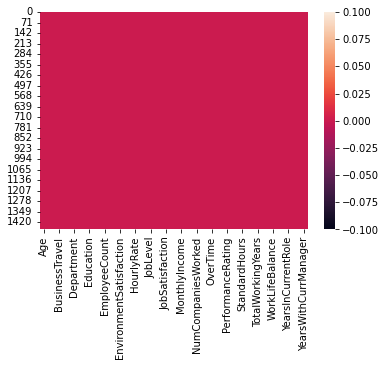

In [6]:
sns.heatmap(df.isnull())

# Data Visualization

In [7]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

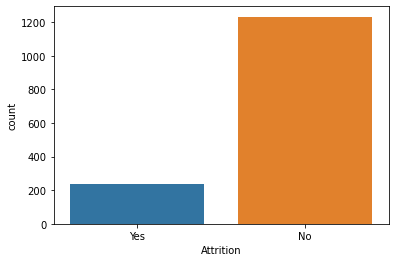

In [8]:
sns.countplot(df['Attrition'])

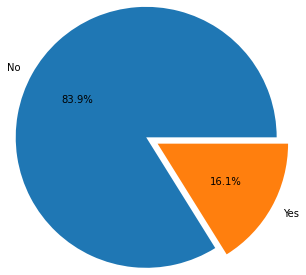

In [9]:
at = df.groupby('Attrition')['Attrition'].count()
plt.pie(at, labels=['No', 'Yes'], explode=[0.05, 0.1], radius=1.5, autopct='%1.1f%%')
plt.show()

We can see from above that the organization has retained around 1233(84%) people while around 237(16%) people have left the organization.

# Nominal Columns(Univariate) Data Visualization 

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


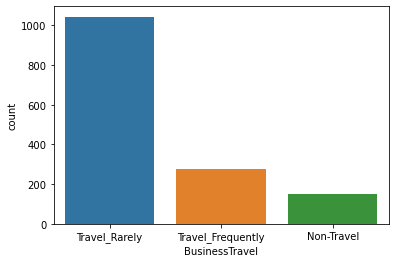

In [10]:
sns.countplot(df['BusinessTravel'])
print(df['BusinessTravel'].value_counts())

We can see that Most of the employess have to Travel Rarely for the organization

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


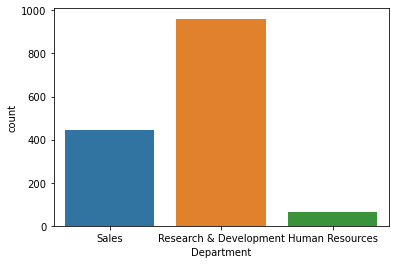

In [11]:
sns.countplot(df['Department'])
print(df['Department'].value_counts())

Most of the Employees belong to R&D department while the Human resource department contains least number of Employees

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


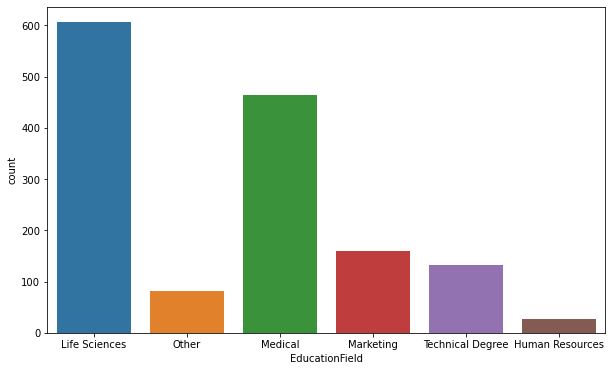

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(df['EducationField'])
print(df['EducationField'].value_counts())

We can see that most of the employees belong 'Life Sciences' or 'Medical' Education Background

Male      882
Female    588
Name: Gender, dtype: int64


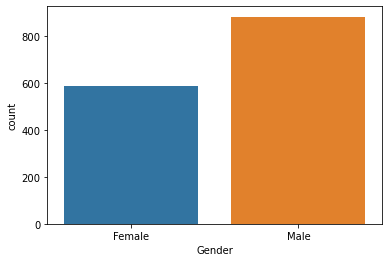

In [13]:
sns.countplot(df['Gender'])
print(df['Gender'].value_counts())

The organizations heve less Female employees i.e.588 & 882 Male employees.

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


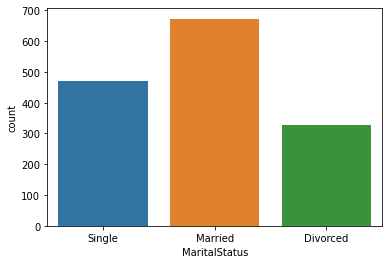

In [14]:
sns.countplot(df['MaritalStatus'])
print(df['MaritalStatus'].value_counts())

Quantity of Employees who are Married are the Highest

No     1054
Yes     416
Name: OverTime, dtype: int64


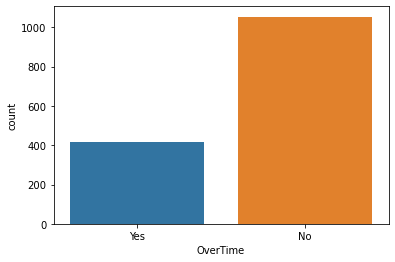

In [15]:
sns.countplot(df['OverTime'])
print(df['OverTime'].value_counts())

Most of the employees i.e. 1054 do not do overtime while only a small quantity of employees i.e. 417 work Overtime as well for the organization

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64


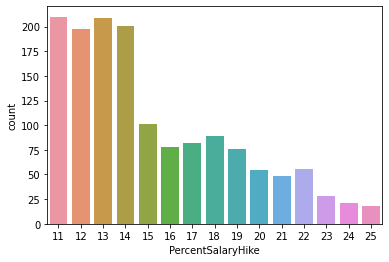

In [16]:
sns.countplot(df['PercentSalaryHike'])
print(df['PercentSalaryHike'].value_counts())

Most of the employees are getting only around 11%-15% Salary Hike while the employees getting salary hike b/w 20%-25% are least in number.

3    1244
4     226
Name: PerformanceRating, dtype: int64


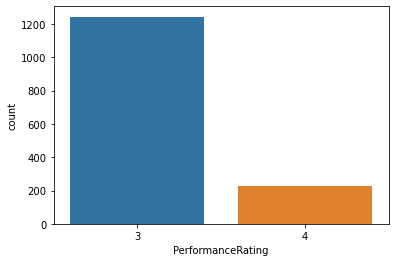

In [17]:
sns.countplot(df['PerformanceRating'])
print(df['PerformanceRating'].value_counts())

Most of the employees are getting Perfornamce rating 3 & only few employees getting 4.

# Distribution Plots

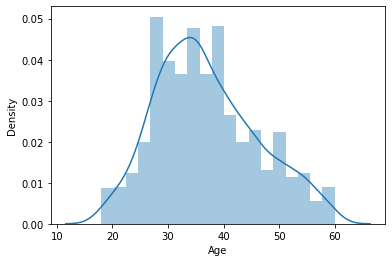

In [18]:
sns.distplot(df['Age'])
plt.show()

We can see that most of the employees fall between 30-40 years of Age Range.

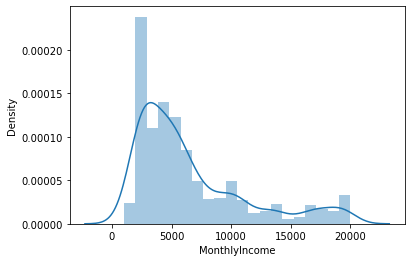

In [19]:
sns.distplot(df['MonthlyIncome'])
plt.show()

Majority of Employees are geeting Monthly Income b/w 2000-5000 Units.

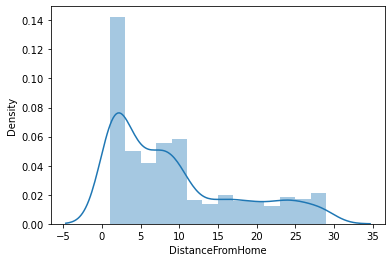

In [20]:
sns.distplot(df['DistanceFromHome'])
plt.show()

Large group of employees have the distance from home to the organization b/w 0-5 Units.And the density of employees decreases as we move towards 30 units.

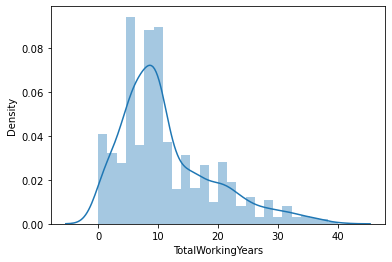

In [21]:
sns.distplot(df['TotalWorkingYears'])
plt.show()

Majority of employees are having a Total Work Experience of 7-10 Years.

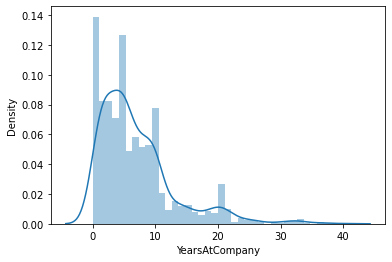

In [22]:
sns.distplot(df['YearsAtCompany'])
plt.show()

Majority of employees are working only 2-5 Years for the company.

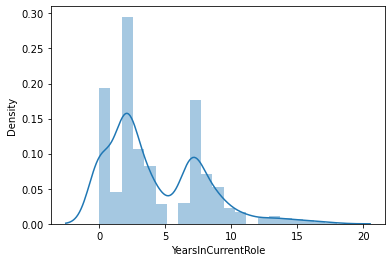

In [23]:
sns.distplot(df['YearsInCurrentRole'])
plt.show()

Majority of employees work 2-3 Years in the same current role.

We can see from above Plots that Skewness is present in MonthlyIncome, DistanceFromHome, TotalWorkingYears, YearsAtCompany & YearsInCurrentRole

# Bivarate Analysis

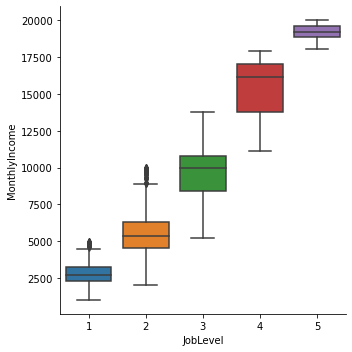

In [24]:
sns.catplot(x='JobLevel',y='MonthlyIncome',data=df,kind='box')

From above plot we can clearly see big Difference in Monthly Income across different job levels.

<function matplotlib.pyplot.show(close=None, block=None)>

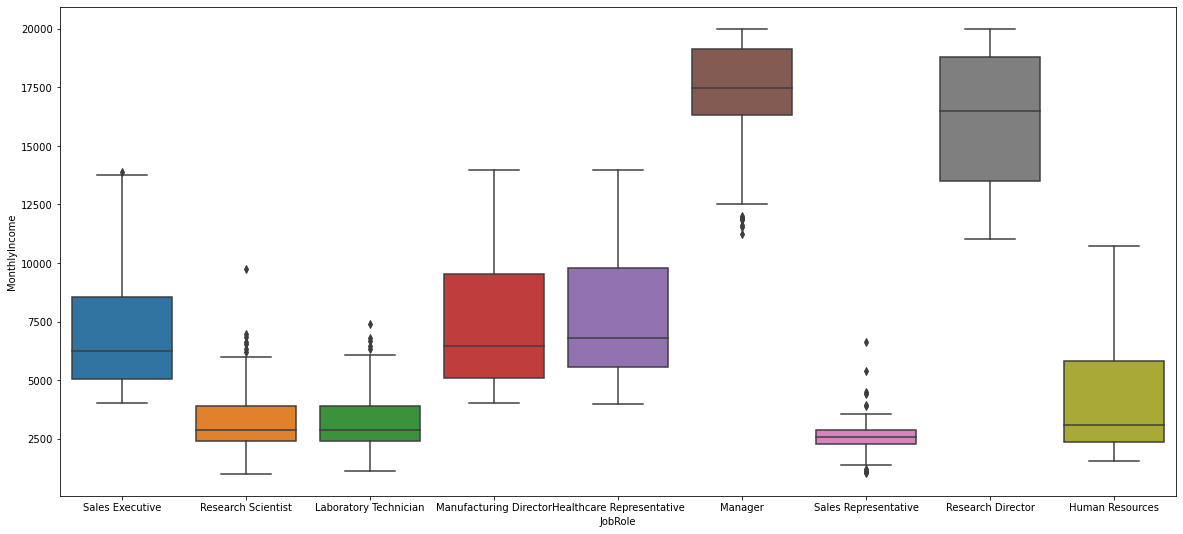

In [25]:
plt.figure(figsize=(20,9))
sns.boxplot(x='JobRole',y='MonthlyIncome',data=df)
plt.show

From above plot we can cleary see that the 'Manager' & 'Research Director' are the highest paying jobs while 'Sales Representative','Research Scientist' & 'Laboratory Technician' employees are earning least. 

<function matplotlib.pyplot.show(close=None, block=None)>

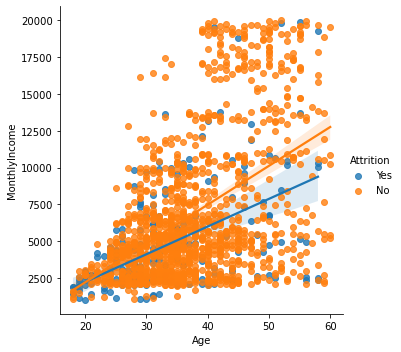

In [26]:
sns.lmplot(x='Age',y='MonthlyIncome',data=df,hue='Attrition')
plt.show

Above plots shows that Monthly Income increases with increase in Age. However the increase is not same for both Attrition groups.

RELATIONSHIP with the TARGET variable.

<function matplotlib.pyplot.show(close=None, block=None)>

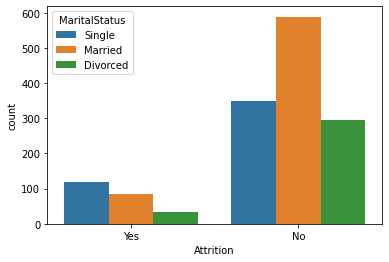

In [27]:
sns.countplot(x='Attrition',hue='MaritalStatus',data=df)
plt.show

From above plot we can see that the 'Single' people are more likely to leave the organization than the once married or divorced.

<function matplotlib.pyplot.show(close=None, block=None)>

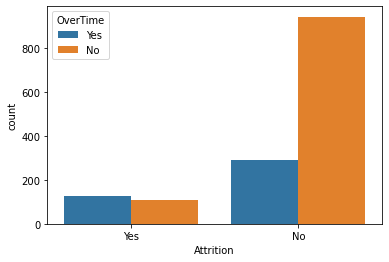

In [28]:
sns.countplot(x='Attrition',hue='OverTime',data=df)
plt.show

We can see that the employees working overtime for the company leave the organization more than the ones who are not doing overtime.

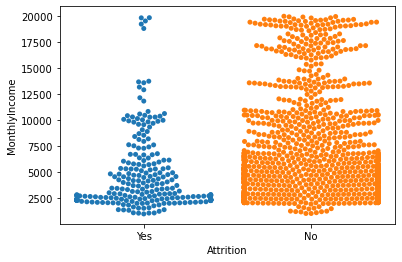

In [29]:
sns.swarmplot(x='Attrition',y='MonthlyIncome',data=df)
plt.show()

From above Plot we can see that the People with Low Monthly Income i.e. b/w 2000 - 3000 Units are more likely to leave the organization.

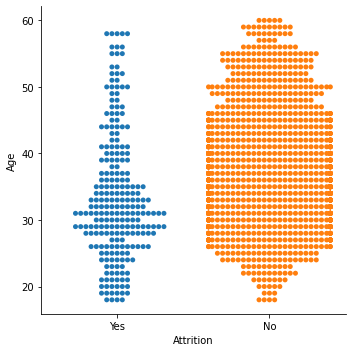

In [30]:
sns.catplot(x='Attrition',y='Age',data=df,kind='swarm')
plt.show()

From above plot we can see that Attrition is highest in people b/w age group 28-32.

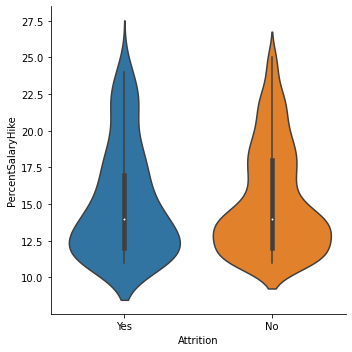

In [31]:
sns.catplot(x='Attrition',y='PercentSalaryHike',data=df,kind='violin')
plt.show()

We can see that Attrition is highest for employees getting Salary Hike of around 12.5%. 

In [32]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [33]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Observations : -
1. Mean > Median ; Hence the data is right skewed for columns :- 'DistanceFromHome','years At company'

<AxesSubplot:>

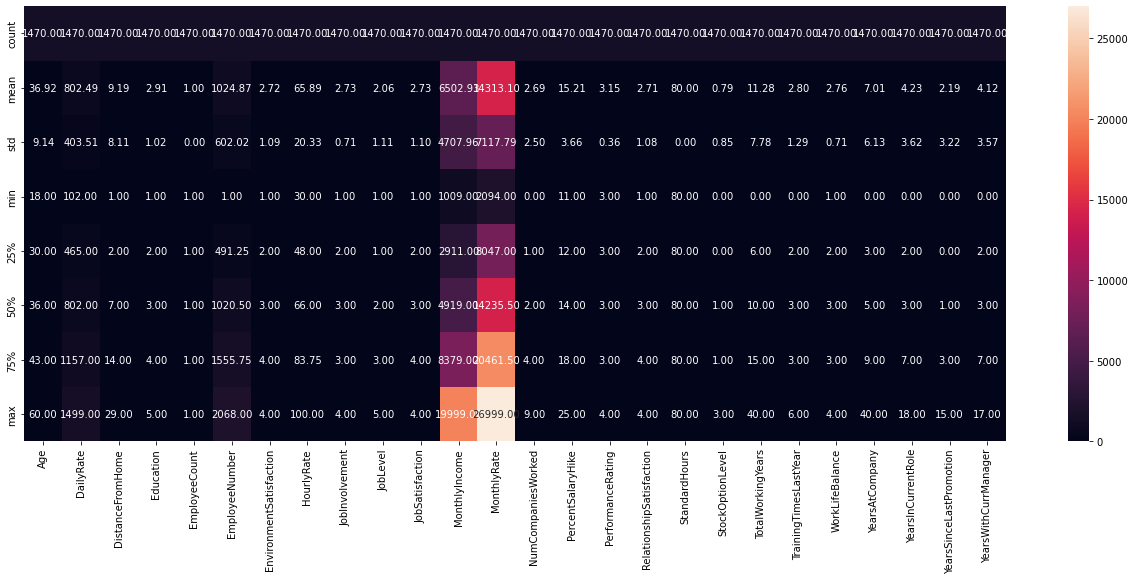

In [34]:
plt.figure(figsize=(22,8))
sns.heatmap(df.describe(),annot=True,fmt="0.2f")

# Data Preparation & Cleaning

'EmployeeCount','EmployeeNumber','StandardHours' & 'Over18' Variable Columns are not useful for the model. As they are not provide any useful information in determining the Attrition Rate.


In [35]:
df.drop({'EmployeeCount','EmployeeNumber','StandardHours','Over18'},axis=1,inplace=True)  # Removing Non-useful columns
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


CORRELATION

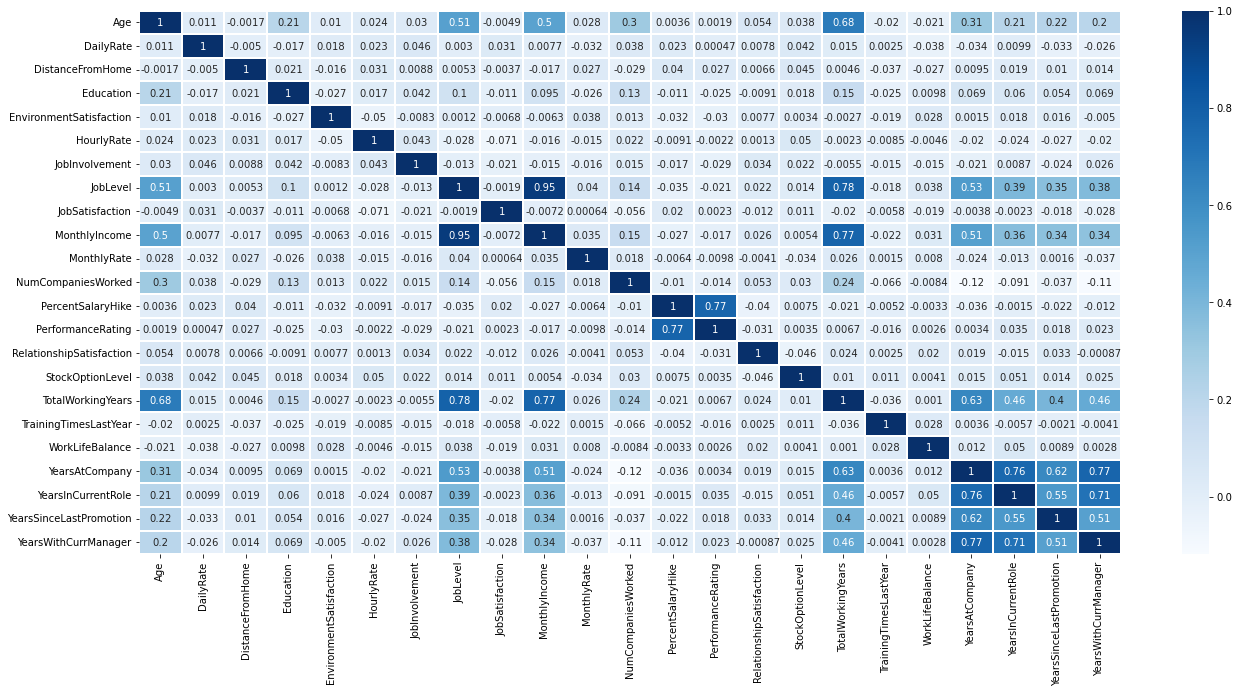

In [36]:
plt.figure(figsize=(22,10))
sns.heatmap(df.corr(),annot=True,linewidths = 2,cmap="Blues")
plt.show()

From above correlation chart we can see that the some columns are having high correlation(>0.7) b/w them. These columns are:-
1. Years At Company & Years In current role
2. Years At Company & Years With current manager
3. Years In current role & Years With current manager
4. Monthly Income & Total Working Years
5. Monthly Income & Job Level
5. Job Level & Total Working Years
6. Percent Salary Hike & Performance Rating
7. Age & Total Working Years

# Label Encoding

Converting the Columns with String values into integers values to use those features for M.L. model.

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Attrition']=le.fit_transform(df['Attrition'])
df['BusinessTravel']=le.fit_transform(df['BusinessTravel'])
df['Department']=le.fit_transform(df['Department'])
df['EducationField']=le.fit_transform(df['EducationField'])
df['Gender']=le.fit_transform(df['Gender'])
df['JobRole']=le.fit_transform(df['JobRole'])
df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])
df['OverTime']=le.fit_transform(df['OverTime'])
df['OverTime']=le.fit_transform(df['OverTime'])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


As we can see now that the Columns with String Values have been converted to Integers using Label Encoding.

CORRELATION with the TARGET Variable

In [38]:
df.corr()['Attrition'].sort_values()

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
HourlyRate                 -0.006846
BusinessTravel              0.000074
PerformanceRating           0.002889
MonthlyRate                 0.015170
EducationField              0.026846
Gender                      0.029453
NumCompaniesWorked          0.043494
Department                  0.063991
JobRole                     0.067151
D

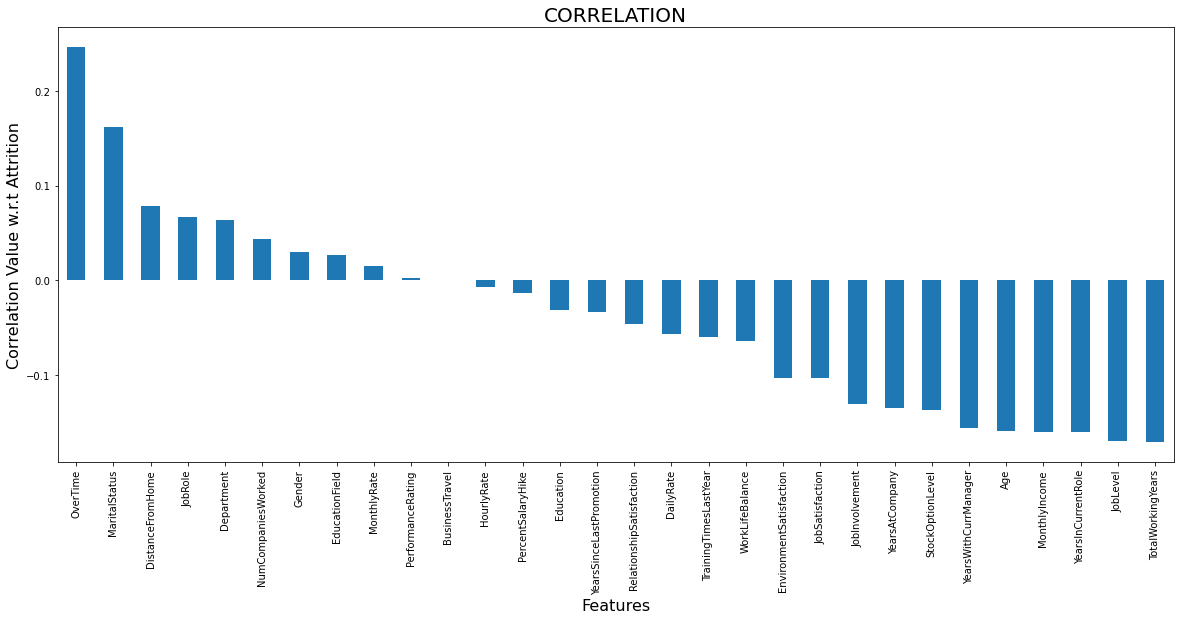

In [39]:
plt.figure(figsize=(20,8))
df.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar')
plt.xlabel("Features",fontsize=16)
plt.ylabel("Correlation Value w.r.t Attrition",fontsize=16)
plt.title("CORRELATION",fontsize=20)
plt.show()

From above we can notice that 'Overtime' is showing highest +ve correlation with Attrition whereas Total Working Years has highest -ve correlation with the target column. Also, 'Business Travel' has very less or no correlation with the Target Column i.e. Atrrition.

# Data Balancing

0    1233
1     237
Name: Attrition, dtype: int64


<AxesSubplot:xlabel='Attrition', ylabel='count'>

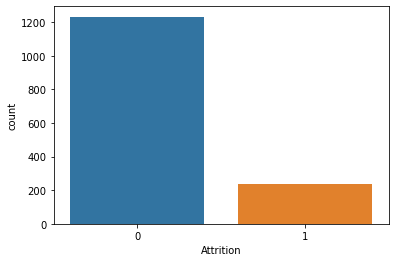

In [40]:
print(df['Attrition'].value_counts())
sns.countplot(df['Attrition'])

As we can see from above that the It is an Imbalanced Dataset because the No. of Entries for Attrition 'YES' is way more than for 'NO' values.

In [41]:
x=df.drop({'Attrition'},axis=1)
y=df.iloc[:,1]
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [42]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
dx,dy=sm.fit_resample(x,y)
dy

0       1
1       0
2       1
3       0
4       0
       ..
2461    1
2462    1
2463    1
2464    1
2465    1
Name: Attrition, Length: 2466, dtype: int32

1    1233
0    1233
Name: Attrition, dtype: int64


<AxesSubplot:xlabel='Attrition', ylabel='count'>

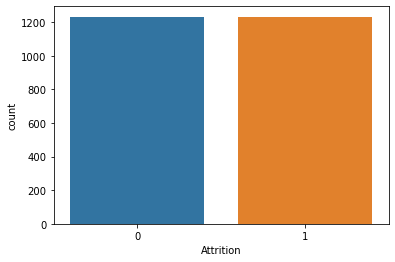

In [43]:
print(dy.value_counts())
sns.countplot(dy)

Now the data is Balanced.

# Treating Outliers

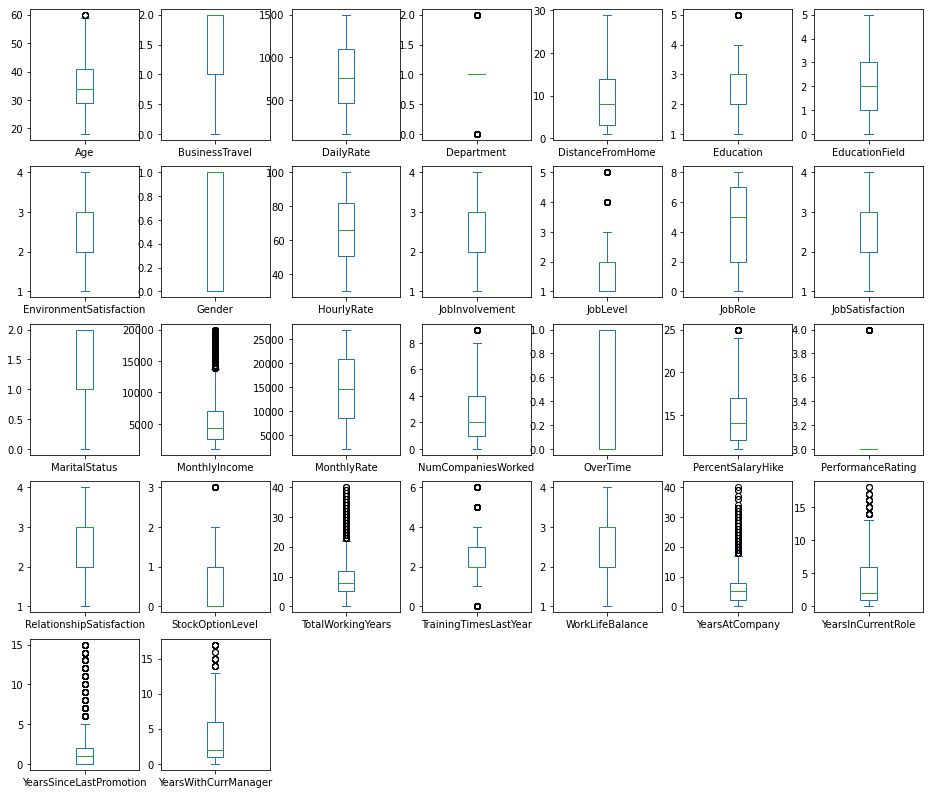

In [44]:
dx.plot(kind='box',subplots=True,layout=(5,7),figsize=(16,14)) 
plt.show()

We can see from above boxplots that ouliers are present in some of the columns like 'MonthlyIncome','TotalWorkingYears', 'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion' & 'YearsWithCurrManager'

Removing Outliers using Z-score

In [45]:
from scipy.stats import zscore               # Removing Outliers from independent variables
z=np.abs(zscore(dx))
z

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.627865,0.744637,0.840795,1.553336,1.113193,0.768415,0.897787,0.441933,1.035504,1.484639,...,0.337374,1.452925,0.743438,0.247881,2.097983,2.130855,0.004147,0.132056,0.652253,0.468208
1,1.527328,0.780508,1.326368,0.369619,0.185021,1.800502,0.897787,0.483200,0.965713,0.261548,...,2.964071,1.416466,0.524417,0.024220,0.359407,0.567316,0.689206,1.035806,0.316107,1.074934
2,0.178133,0.744637,1.554406,0.369619,0.980597,0.768415,1.494803,1.408333,0.965713,1.378809,...,0.337374,0.496461,0.743438,0.383932,0.359407,0.567316,1.044178,1.072943,0.652253,1.048608
3,0.271599,0.780508,1.604438,0.369619,0.848001,1.295759,0.897787,1.408333,1.035504,0.526122,...,0.337374,0.460002,0.743438,0.247881,0.359407,0.567316,0.342530,1.035806,0.356183,1.048608
4,0.946197,0.744637,0.504795,0.369619,0.980597,1.800502,0.697273,1.367066,0.965713,1.372758,...,0.337374,1.416466,0.524417,0.519983,0.359407,0.567316,0.697501,0.470443,0.020038,0.441882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,1.171062,0.744637,0.337845,0.369619,0.980597,0.768415,0.897787,1.367066,1.035504,0.373429,...,0.337374,0.496461,0.743438,0.792084,0.359407,0.781769,0.697501,0.470443,0.020038,1.048608
2462,1.733227,0.780508,0.201971,1.553336,0.848001,1.800502,1.494803,1.367066,1.035504,1.220065,...,0.337374,0.496461,0.743438,1.064185,0.359407,0.567316,0.697501,0.771693,0.652253,0.745245
2463,0.290566,0.744637,0.882927,0.369619,0.450213,0.768415,0.100257,1.408333,1.035504,0.214685,...,0.337374,0.460002,0.743438,0.383932,0.459723,2.130855,0.870839,0.771693,0.316107,0.745245
2464,0.290566,0.744637,1.699235,1.553336,0.212767,1.295759,0.100257,1.367066,1.035504,1.378809,...,0.337374,0.496461,1.792271,0.432372,0.459723,0.781769,0.697501,0.470443,0.316107,0.441882


In [46]:
# Now to take out the ouliers taking threshold 3
# All values with Z-score >3 will be considered as ouliers
# Making a new file for values with z-score<3

threshold=3
dx_new=dx[(z<3).all(axis=1)]
dx_new

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,25,2,911,1,2,2,1,1,0,73,...,3,2,0,4,3,2,2,2,2,0
2462,20,1,706,2,3,1,4,1,0,89,...,3,2,0,2,3,3,2,1,0,1
2463,38,2,1118,1,6,2,2,4,0,70,...,3,3,0,7,2,1,1,1,1,1
2464,38,2,1428,2,11,4,2,1,0,92,...,3,2,2,13,2,2,2,2,1,2


In [47]:
print(np.where(z>3)[0])

[   6   18   25   25   28   29   29   45   45   45   45   55   62   62
   62   62   63   64   64   64   65   83   85   88   90   92   98   98
  105  105  106  110  119  120  122  123  123  123  123  123  126  126
  126  144  153  165  165  178  178  178  186  186  187  187  187  187
  187  190  190  190  190  190  190  193  194  205  218  222  231  231
  231  231  231  233  233  233  237  237  237  237  237  240  244  244
  244  251  257  257  270  270  270  270  279  279  280  281  281  290
  294  304  311  314  319  321  326  326  326  329  335  338  386  386
  390  392  392  400  400  401  401  411  411  411  411  411  413  417
  417  424  425  425  427  428  436  440  445  466  466  473  473  473
  477  477  477  497  497  508  523  526  534  535  535  535  535  538
  538  544  561  561  561  568  568  584  584  584  586  592  592  595
  595  595  595  595  595  615  616  621  624  635  635  645  649  653
  653  657  677  683  686  695  701  714  716  716  716  730  738  741
  746 

In [48]:
dy_new = dy.drop(np.where(z>3)[0],axis=0)     # Dropping the rows from same locations from target varibles
dy_new

0       1
1       0
2       1
3       0
4       0
       ..
2461    1
2462    1
2463    1
2464    1
2465    1
Name: Attrition, Length: 2198, dtype: int32

In [49]:
dx_new['Attrition'] = dy_new
dx_new

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2,1102,2,1,2,1,2,0,94,...,1,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,3,1,61,...,4,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,4,1,92,...,2,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,4,0,56,...,3,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,1,1,40,...,4,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,25,2,911,1,2,2,1,1,0,73,...,2,0,4,3,2,2,2,2,0,1
2462,20,1,706,2,3,1,4,1,0,89,...,2,0,2,3,3,2,1,0,1,1
2463,38,2,1118,1,6,2,2,4,0,70,...,3,0,7,2,1,1,1,1,1,1
2464,38,2,1428,2,11,4,2,1,0,92,...,2,2,13,2,2,2,2,1,2,1


In [50]:
dx_new.shape

(2198, 31)

# Skewness

In [51]:
dx_new.skew()

Age                         0.562095
BusinessTravel             -0.955041
DailyRate                   0.085275
Department                  0.201470
DistanceFromHome            0.851856
Education                  -0.123473
EducationField              0.655599
EnvironmentSatisfaction    -0.007630
Gender                     -0.052830
HourlyRate                 -0.011517
JobInvolvement             -0.265487
JobLevel                    1.022834
JobRole                    -0.399296
JobSatisfaction            -0.040571
MaritalStatus              -0.154501
MonthlyIncome               1.505207
MonthlyRate                 0.014009
NumCompaniesWorked          1.001936
OverTime                    0.924815
PercentSalaryHike           0.789071
PerformanceRating           2.700900
RelationshipSatisfaction   -0.035512
StockOptionLevel            0.992619
TotalWorkingYears           1.097199
TrainingTimesLastYear       0.554413
WorkLifeBalance            -0.392290
YearsAtCompany              1.258605
Y

Taking Skewness threshold +/- 0.5. We can see that the following columns are having skewnees :-
1. Age
2. DistanceFromHome
3. MonthlyIncome
4. NumCompaniesWorked 
5. PercentSalaryHike
6. TotalWorkingYears
7. YearsAtCompany
8. YearsInCurrentRole
9. YearsSinceLastPromotion
10. YearsWithCurrManager

We will not consider the Skewnees of Categorical columns.

Using Boxcox Transformation for Columns not containing 0 or -ve Values.

In [52]:
from scipy.stats import boxcox
dx_new['MonthlyIncome']=boxcox(dx_new['MonthlyIncome'],0)
dx_new['Age']=boxcox(dx_new['Age'],0)
dx_new['DistanceFromHome']=boxcox(dx_new['DistanceFromHome'],0.5)
dx_new['PercentSalaryHike']=boxcox(dx_new['PercentSalaryHike'],0)
dx_new.skew()

Age                        -0.051822
BusinessTravel             -0.955041
DailyRate                   0.085275
Department                  0.201470
DistanceFromHome            0.252372
Education                  -0.123473
EducationField              0.655599
EnvironmentSatisfaction    -0.007630
Gender                     -0.052830
HourlyRate                 -0.011517
JobInvolvement             -0.265487
JobLevel                    1.022834
JobRole                    -0.399296
JobSatisfaction            -0.040571
MaritalStatus              -0.154501
MonthlyIncome               0.341145
MonthlyRate                 0.014009
NumCompaniesWorked          1.001936
OverTime                    0.924815
PercentSalaryHike           0.452353
PerformanceRating           2.700900
RelationshipSatisfaction   -0.035512
StockOptionLevel            0.992619
TotalWorkingYears           1.097199
TrainingTimesLastYear       0.554413
WorkLifeBalance            -0.392290
YearsAtCompany              1.258605
Y

Using Square Root & Cuberoot transformation for other columns.

In [53]:
dx_new['NumCompaniesWorked']=np.sqrt(dx_new['NumCompaniesWorked'])
dx_new['TotalWorkingYears']=np.sqrt(dx_new['TotalWorkingYears'])
dx_new['YearsAtCompany']=np.sqrt(dx_new['YearsAtCompany'])
dx_new['YearsInCurrentRole']=np.sqrt(dx_new['YearsInCurrentRole'])
dx_new['YearsWithCurrManager']=np.sqrt(dx_new['YearsWithCurrManager'])
dx_new['YearsSinceLastPromotion']=np.cbrt(dx_new['YearsSinceLastPromotion'])
dx_new.skew()

Age                        -0.051822
BusinessTravel             -0.955041
DailyRate                   0.085275
Department                  0.201470
DistanceFromHome            0.252372
Education                  -0.123473
EducationField              0.655599
EnvironmentSatisfaction    -0.007630
Gender                     -0.052830
HourlyRate                 -0.011517
JobInvolvement             -0.265487
JobLevel                    1.022834
JobRole                    -0.399296
JobSatisfaction            -0.040571
MaritalStatus              -0.154501
MonthlyIncome               0.341145
MonthlyRate                 0.014009
NumCompaniesWorked         -0.065588
OverTime                    0.924815
PercentSalaryHike           0.452353
PerformanceRating           2.700900
RelationshipSatisfaction   -0.035512
StockOptionLevel            0.992619
TotalWorkingYears          -0.047979
TrainingTimesLastYear       0.554413
WorkLifeBalance            -0.392290
YearsAtCompany              0.035890
Y

Now we can se that Skewness Values for all columns with continuos values have been reduced to b.w. +/-0.5.

# Treating Multicollinearity

Checking Variance Inflation Factor(VIF)

In [54]:
x=dx_new.iloc[:,:-1]
y=pd.DataFrame(dx_new.iloc[:,-1])
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3.713572,2,1102,2,0.000000,2,1,2,0,94,...,3,1,0,2.828427,0,1,2.449490,2.000000,0.000000,2.236068
1,3.891820,1,279,1,3.656854,1,1,3,1,61,...,4,4,1,3.162278,3,3,3.162278,2.645751,1.000000,2.645751
2,3.610918,2,1373,1,0.828427,2,4,4,1,92,...,3,2,0,2.645751,3,3,0.000000,0.000000,0.000000,0.000000
3,3.496508,1,1392,1,1.464102,4,1,4,0,56,...,3,3,0,2.828427,3,3,2.828427,2.645751,1.442250,0.000000
4,3.295837,2,591,1,0.828427,1,3,1,1,40,...,3,4,1,2.449490,3,3,1.414214,1.414214,1.259921,1.414214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,3.218876,2,911,1,0.828427,2,1,1,0,73,...,3,2,0,2.000000,3,2,1.414214,1.414214,1.259921,0.000000
2462,2.995732,1,706,2,1.464102,1,4,1,0,89,...,3,2,0,1.414214,3,3,1.414214,1.000000,0.000000,1.000000
2463,3.637586,2,1118,1,2.898979,2,2,4,0,70,...,3,3,0,2.645751,2,1,1.000000,1.000000,1.000000,1.000000
2464,3.637586,2,1428,2,4.633250,4,2,1,0,92,...,3,2,2,3.605551,2,2,1.414214,1.414214,1.000000,1.414214


In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["Variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [57]:
calc_vif(x)

,Variables,VIF FACTOR
0,Age,338.269766
1,BusinessTravel,6.480069
2,DailyRate,5.527386
3,Department,12.909185
4,DistanceFromHome,3.352821
5,Education,9.786824
6,EducationField,4.069386
7,EnvironmentSatisfaction,6.753796
8,Gender,2.178441
9,HourlyRate,13.836386


From V.I.F. values we can see that : -
   1. Age, MonthlyIncome, PercentSalaryHike - are having very high VIF close to each other so we can drop them.

In [58]:
x.drop({'MonthlyIncome','Age','PercentSalaryHike'},axis=1,inplace=True)  
x.head()

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,1102,2,0.000000,2,1,2,0,94,3,...,3,1,0,2.828427,0,1,2.449490,2.000000,0.000000,2.236068
1,1,279,1,3.656854,1,1,3,1,61,2,...,4,4,1,3.162278,3,3,3.162278,2.645751,1.000000,2.645751
2,2,1373,1,0.828427,2,4,4,1,92,2,...,3,2,0,2.645751,3,3,0.000000,0.000000,0.000000,0.000000
3,1,1392,1,1.464102,4,1,4,0,56,3,...,3,3,0,2.828427,3,3,2.828427,2.645751,1.442250,0.000000
4,2,591,1,0.828427,1,3,1,1,40,3,...,3,4,1,2.449490,3,3,1.414214,1.414214,1.259921,1.414214


In [59]:
calc_vif(x)

,Variables,VIF FACTOR
0,BusinessTravel,6.379281
1,DailyRate,5.400498
2,Department,12.824459
3,DistanceFromHome,3.287485
4,Education,9.440929
5,EducationField,4.029979
6,EnvironmentSatisfaction,6.692308
7,Gender,2.173942
8,HourlyRate,12.646120
9,JobInvolvement,13.520071


Now we can see that the V.I.F. Values have been reduced & most of the values are below or around 10.

In [60]:
x.describe()

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,...,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000
mean,1.499545,780.269791,1.190173,3.655819,2.710191,2.123294,2.456324,0.513194,65.905369,2.488171,...,3.098271,2.480437,0.493176,2.725409,2.547771,2.560055,2.037794,1.495106,0.707637,1.439353
std,0.655324,376.650312,0.521066,2.454292,0.958490,1.257764,1.075508,0.499940,18.769089,0.746161,...,0.297749,1.039208,0.659443,1.015038,1.218968,0.747496,0.921246,0.960229,0.708141,0.996425
min,0.000000,103.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,30.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,464.250000,1.000000,1.464102,2.000000,1.000000,1.000000,0.000000,51.000000,2.000000,...,3.000000,2.000000,0.000000,2.236068,2.000000,2.000000,1.414214,1.000000,0.000000,1.000000
50%,2.000000,756.500000,1.000000,3.656854,3.000000,2.000000,3.000000,1.000000,66.000000,3.000000,...,3.000000,3.000000,0.000000,2.828427,2.000000,3.000000,2.000000,1.414214,1.000000,1.414214
75%,2.000000,1097.000000,1.000000,5.483315,3.000000,3.000000,3.000000,1.000000,81.000000,3.000000,...,3.000000,3.000000,1.000000,3.162278,3.000000,3.000000,2.645751,2.236068,1.259921,2.236068
max,2.000000,1498.000000,2.000000,8.770330,5.000000,5.000000,4.000000,1.000000,100.000000,4.000000,...,4.000000,4.000000,2.000000,5.567764,6.000000,4.000000,4.795832,3.605551,2.154435,3.605551


# Data Scaling

As we can see the above columns are in different scales. So we will use encoding techniques to scale the data.  

In [61]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()

In [63]:
scale=st.fit_transform(x)
x=pd.DataFrame(scale,columns=x.columns)
x

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.763850,0.854382,1.554526,-1.489901,-0.741116,-0.893291,-0.424384,-1.026745,1.497197,0.686106,...,-0.330122,-1.424905,-0.748037,0.101515,-2.090581,-2.087517,0.446992,0.525926,-0.999516,0.799755
1,-0.762461,-1.331165,-0.365052,0.000422,-1.784661,-0.893291,0.505621,0.973952,-0.261413,-0.654393,...,3.029179,1.462564,0.768740,0.430494,0.371078,0.588693,1.220891,1.198576,0.412954,1.211002
2,0.763850,1.574046,-0.365052,-1.152282,-0.741116,1.492437,1.435626,0.973952,1.390615,-0.654393,...,-0.330122,-0.462416,-0.748037,-0.078496,0.371078,0.588693,-2.212502,-1.557384,-0.999516,-1.444845
3,-0.762461,1.624503,-0.365052,-0.893218,1.345973,-0.893291,1.435626,-1.026745,-0.527869,0.686106,...,-0.330122,0.500074,-0.748037,0.101515,0.371078,0.588693,0.858418,1.198576,1.037618,-1.444845
4,0.763850,-0.502622,-0.365052,-1.152282,-1.784661,0.697194,-1.354388,0.973952,-1.380529,0.686106,...,-0.330122,1.462564,0.768740,-0.271893,0.371078,0.588693,-0.677042,-0.084262,0.780085,-0.025235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,0.763850,0.347165,-0.365052,-1.152282,-0.741116,-0.893291,-1.354388,-1.026745,0.378082,-0.654393,...,-0.330122,-0.462416,-0.748037,-0.714825,0.371078,-0.749412,-0.677042,-0.084262,0.780085,-1.444845
2194,-0.762461,-0.197230,1.554526,-0.893218,-1.784661,1.492437,-1.354388,-1.026745,1.230741,-0.654393,...,-0.330122,-0.462416,-0.748037,-1.292064,0.371078,0.588693,-0.677042,-0.515729,-0.999516,-0.441030
2195,0.763850,0.896872,-0.365052,-0.308444,-0.741116,-0.098049,1.435626,-1.026745,0.218208,0.686106,...,-0.330122,0.500074,-0.748037,-0.078496,-0.449475,-2.087517,-1.126768,-0.515729,0.412954,-0.441030
2196,0.763850,1.720104,1.554526,0.398344,1.345973,-0.098049,-1.354388,-1.026745,1.390615,-1.994892,...,-0.330122,-0.462416,2.285517,0.867300,-0.449475,-0.749412,-0.677042,-0.084262,0.412954,-0.025235


Now we can see all the Input data is in same scale.

# Splitting the Data

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

Finding out the best Random State Value.

In [65]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=0.22)
    lg.fit(x_train,y_train)
    pred_test=lg.predict(x_test)
    if round(accuracy_score(y_test,pred_test)*100,1) > 86.0:
        print("At random state",i,"The model preforms very well")
        print("Model Accuracy score is :-",accuracy_score(y_test,pred_test)*100,'\n')

At random state 40 The model preforms very well
Model Accuracy score is :- 86.57024793388429 

At random state 345 The model preforms very well
Model Accuracy score is :- 86.77685950413223 

At random state 359 The model preforms very well
Model Accuracy score is :- 86.15702479338843 

At random state 470 The model preforms very well
Model Accuracy score is :- 86.57024793388429 

At random state 748 The model preforms very well
Model Accuracy score is :- 86.57024793388429 

At random state 842 The model preforms very well
Model Accuracy score is :- 86.36363636363636 

At random state 919 The model preforms very well
Model Accuracy score is :- 86.77685950413223 



As we can see that Model is working best at Random State 345 as the accuracy score is highest there. So, using random state = 345 for further working.

In [66]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=345,test_size=0.30)

In [67]:
x_train.shape

(1538, 27)

In [68]:
y_train.shape

(1538, 1)

In [69]:
x_test.shape

(660, 27)

In [70]:
y_test.shape

(660, 1)

# Testing with Different Models

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [72]:
lg = LogisticRegression()
gb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors = 5)
svc = SVC(kernel='rbf')
dtc = DecisionTreeClassifier()

model = [lg,gb,knn,svc,dtc]

for m in model:
    m.fit(x_train,y_train)
    pred_test=m.predict(x_test)
    print('Accuracy Score of',m,'is:',accuracy_score(y_test,pred_test))
    print(confusion_matrix(y_test,pred_test))
    print(classification_report(y_test,pred_test))
    print('\n')

Accuracy Score of LogisticRegression() is: 0.8590909090909091
[[256  55]
 [ 38 311]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       311
           1       0.85      0.89      0.87       349

    accuracy                           0.86       660
   macro avg       0.86      0.86      0.86       660
weighted avg       0.86      0.86      0.86       660



Accuracy Score of GaussianNB() is: 0.7803030303030303
[[245  66]
 [ 79 270]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       311
           1       0.80      0.77      0.79       349

    accuracy                           0.78       660
   macro avg       0.78      0.78      0.78       660
weighted avg       0.78      0.78      0.78       660



Accuracy Score of KNeighborsClassifier() is: 0.8
[[183 128]
 [  4 345]]
              precision    recall  f1-score   support

           0       0.98      0.59      0.73       311

From above we can see that LogisticRegression() & Support Vector Classfier() are working best for the data.

# Ensemble Techniques

Using various Bagging & Boosting Ensemble methods to train the data to increase the model performance.  

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
rf = RandomForestClassifier(n_estimators=100)
bg = BaggingClassifier(n_estimators=100)
ad = AdaBoostClassifier(n_estimators=100)
gb = GradientBoostingClassifier(n_estimators=100)

model = [rf,bg,ad,gb]

for m in model:
    m.fit(x_train,y_train)
    pred_test=m.predict(x_test)
    print('Accuracy Score of',m,'is:',accuracy_score(y_test,pred_test))
    print(confusion_matrix(y_test,pred_test))
    print(classification_report(y_test,pred_test))
    print('\n')

Accuracy Score of RandomForestClassifier() is: 0.9015151515151515
[[279  32]
 [ 33 316]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       311
           1       0.91      0.91      0.91       349

    accuracy                           0.90       660
   macro avg       0.90      0.90      0.90       660
weighted avg       0.90      0.90      0.90       660



Accuracy Score of BaggingClassifier(n_estimators=100) is: 0.8848484848484849
[[274  37]
 [ 39 310]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       311
           1       0.89      0.89      0.89       349

    accuracy                           0.88       660
   macro avg       0.88      0.88      0.88       660
weighted avg       0.88      0.88      0.88       660



Accuracy Score of AdaBoostClassifier(n_estimators=100) is: 0.8787878787878788
[[268  43]
 [ 37 312]]
              precision    recall  f1-score   suppor

From above ensemble methods we can see that RandomForestClassifier is working best for the Model as it is obatining highest accuracy of 90%.

# Cross-Validation of Algorithms

Checking cross_val_scores for all the models which are performing good(i.e. Algorithms with high accuracy scores) to know the actual performance of the Model.

In [77]:
from sklearn.model_selection import cross_val_score
model = [lg,svc,rf,bg,ad,gb]

for m in model:
    score = cross_val_score(m,x,y,cv=5)
    c_score = score.mean()
    print("For",m,"Cross Validation score is:-",c_score*100)
    print("\n")

For LogisticRegression() Cross Validation score is:- 80.57755228825843


For SVC() Cross Validation score is:- 86.99306274591014


For RandomForestClassifier() Cross Validation score is:- 89.40370677158832


For BaggingClassifier(n_estimators=100) Cross Validation score is:- 87.58376475460757


For AdaBoostClassifier(n_estimators=100) Cross Validation score is:- 84.03582522261338


For GradientBoostingClassifier() Cross Validation score is:- 86.08293642576102




Now from above we can confirm that RandomForestClassifier() is working Best for the data with highest Cross Val Score.

Using RandomForestClassifier as the Final Algorithm & Optimizaztion.

# Hyperparameter tuning

Using GridSearchCV for further Model optimization.

In [78]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()

In [79]:
grid_param = {'n_estimators':[80,100,140,200],'criterion':['gini','entropy'],'max_features':['auto', 'sqrt', 'log2'],'max_depth':[5,6,7,8]}

gd_sr = GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x_train,y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

best_result = gd_sr.best_score_
print(best_result)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 80}
0.8842632937095478


As we can see from above that the Model Performance has reduced from the default values of RandomForestClassifier(). Hence proceeding with the default parameter values of RandomForestClassifier() only.

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)

In [83]:
rf.fit(x_train,y_train)
pred_test=rf.predict(x_test)
print('Accuracy Score of',rf,'is:',accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

Accuracy Score of RandomForestClassifier() is: 0.9045454545454545
[[283  28]
 [ 35 314]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       311
           1       0.92      0.90      0.91       349

    accuracy                           0.90       660
   macro avg       0.90      0.90      0.90       660
weighted avg       0.90      0.90      0.90       660



# Cross-Validation of Best Model

In [84]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    score = cross_val_score(rf,x,y,cv=i)
    c_score = score.mean()
    print("At cv:-",i)
    print("Cross Validation score is:-",c_score*100)
    print("Accuracy Score of model is :-",accuracy_score(y_test,pred_test)*100)
    print("\n")

At cv:- 2
Cross Validation score is:- 87.80709736123748
Accuracy Score of model is :- 90.45454545454545


At cv:- 3
Cross Validation score is:- 88.58267667618416
Accuracy Score of model is :- 90.45454545454545


At cv:- 4
Cross Validation score is:- 88.85775790693823
Accuracy Score of model is :- 90.45454545454545


At cv:- 5
Cross Validation score is:- 89.54038103126942
Accuracy Score of model is :- 90.45454545454545


At cv:- 6
Cross Validation score is:- 90.36221418184165
Accuracy Score of model is :- 90.45454545454545


At cv:- 7
Cross Validation score is:- 90.76433121019109
Accuracy Score of model is :- 90.45454545454545


At cv:- 8
Cross Validation score is:- 90.54114134041141
Accuracy Score of model is :- 90.45454545454545


At cv:- 9
Cross Validation score is:- 90.86688227203452
Accuracy Score of model is :- 90.45454545454545




Since Cross Validation Score is almost equal to Accuracy Score. Hence we are heading towards a good approach and there is no overfitting/underfitting. 

Accuracy score is closet to Cross Val Score at cv = 6.

In [85]:
score = cross_val_score(rf,x,y,cv=6)
c_score = score.mean()
print("Cross Validation score is:-",c_score*100)
print("Accuracy Score of model is :-",accuracy_score(y_test,pred_test)*100)

Cross Validation score is:- 90.68035516644085
Accuracy Score of model is :- 90.45454545454545


# AUC ROC Curve

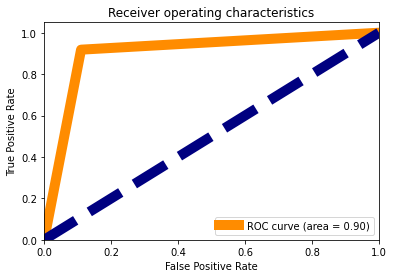

In [86]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred_test,y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=10,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

# Saving the best Model

In [87]:
import pickle

filename = 'HR_Analytics.pkl'

pickle.dump(rf, open(filename,'wb'))  

# Conclusion

In [88]:
loaded_model = pickle.load(open('HR_Analytics.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.9045454545454545


In [89]:
original=np.array(y_test).reshape(-1)
predicted=np.array(loaded_model.predict(x_test)).reshape(-1)
conclusion = pd.DataFrame({"Original":original,"Predicted":predicted}, index= range(len(original)))
conclusion

,Original,Predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
655,0,0
656,0,0
657,1,0
658,1,1


From above we can see that most of the predicted & original values are matching. Hence our model is performing good.